In [5]:
%%html

Page Links — <a href="index.html" target="_self">Project Overview Page</a>
— <a href="page1.html" target="_self">Dataset Page</a>
— <a href="page2.html" target="_self">Data Imputation Page</a>
— <a href="page3.html" target="_self">Data Exploration Page</a>
— <a href="page4.html" target="_self">Data Modeling Page</a>

In [2]:
# Toggle raw code on/off, from stackoverflow
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle raw code on/off"></form>''')

---

# Import Libraries

In [1]:
import datetime
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import random
import math
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from statsmodels.regression.linear_model import OLS
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from dateutil.relativedelta import relativedelta
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeRegressor as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
import sklearn.preprocessing as Preprocessing
import csv
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf_ols, pacf
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.vector_ar.dynamic import DynamicVAR
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from pandas.tools.plotting import autocorrelation_plot
import matplotlib.colors as colors
import scipy as sp
from collections import Counter
import time
from statsmodels.graphics import utils
from scipy.stats import itemfreq
from itertools import combinations
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt

Since the train dataset is extremely large (> 25 megabytes), it cannot be uploaded directly to our Jupyter demo program. As a result, it was split into two separate files in excel, titled train_half_1.csv and train_half_2.csv. These were immediately merged once in Jupyter's environment. 

Per the Kaggle competition descriptions, the files represent the following:
- train_half_1.csv is 1st half of historical data including sales
- train_half_2.csv is 2nd half of historical data including sales
- test.csv is historical data excluding sales
- store.csv is supplemental information about the stores

The uploading process is featured below.

In [2]:
# upload data files
train_half_1 = pd.read_csv('train_half_1.csv')
train_half_2 = pd.read_csv('train_half_2.csv', header = None)
test = pd.read_csv('test.csv')
store = pd.read_csv('store.csv')

C:\Users\lukak\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
# view tails of data to double check file uploads
train_half_1.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
499993,144,3,4/9/14,6313,592,1,0,0,0
499994,145,3,4/9/14,6895,1115,1,0,0,0
499995,146,3,4/9/14,6562,672,1,0,0,0
499996,147,3,4/9/14,6669,825,1,0,0,0
499997,148,3,4/9/14,7225,757,1,0,0,0


In [42]:
train_half_2.tail()

,0,1,2,3,4,5,6,7,8
517206,1111,2,1/1/13,0,0,0,0,a,1
517207,1112,2,1/1/13,0,0,0,0,a,1
517208,1113,2,1/1/13,0,0,0,0,a,1
517209,1114,2,1/1/13,0,0,0,0,a,1
517210,1115,2,1/1/13,0,0,0,0,a,1


In [43]:
# rename columns
train_half_2.columns = ["Store", "DayOfWeek", "Date", "Sales", "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday"]

In [44]:
# check columns
train_half_2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
517206,1111,2,1/1/13,0,0,0,0,a,1
517207,1112,2,1/1/13,0,0,0,0,a,1
517208,1113,2,1/1/13,0,0,0,0,a,1
517209,1114,2,1/1/13,0,0,0,0,a,1
517210,1115,2,1/1/13,0,0,0,0,a,1


In [45]:
test.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [46]:
store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [47]:
# adjust data file for first half (corrupted)
train_half_1 = train_half_1.loc[0:499997, :]

# check if corrected
train_half_1.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
499993,144,3,4/9/14,6313,592,1,0,0,0
499994,145,3,4/9/14,6895,1115,1,0,0,0
499995,146,3,4/9/14,6562,672,1,0,0,0
499996,147,3,4/9/14,6669,825,1,0,0,0
499997,148,3,4/9/14,7225,757,1,0,0,0


In [3]:
# append train_half_2 to the end of train_half_1
combined_set = [train_half_1, train_half_2]
train = pd.concat(combined_set)
print "There are " + str(np.shape(train)[0]) + " observations for the Rossman training dataset, which is what the Kaggle description describes. We may now proceed to the imputation phase of our analysis."

There are 1017209 observations for the Rossman training dataset, which is what the Kaggle description describes. We may now proceed to the imputation phase of our analysis.


# Data Cleaning and Identification of Missing Data (and pre-Imputation)

**Prior to modeling, we need to analyze the dates that may be missing data for sales (e.g. store renovations). Visualizations and analyses will help us determine where and how to impute, which is show below.**

At first, we thought about various ways to determine where data for sales needed to be imputed. An immediate thought was where Sales == 0, but the logic here is flawed, as it is possible for a store not to have sales one day. Ultimately, using forums found on Kaggle's https://www.kaggle.com/nsecord/rossmann-store-sales/filling-gaps-in-the-training-set, we decided upon plotting number of stores operating versus date.

In [49]:
# create dates variable
traindate = train["Date"]

In [50]:
# sort all days, then create variable "dates" with each date listed once and sorted
dates_chronological = sorted(traindate, key=lambda x: datetime.datetime.strptime(x, '%m/%d/%y'))

dates = sorted(set(dates_chronological), key=lambda x: datetime.datetime.strptime(x, '%m/%d/%y'))

print "The data covers dates that span " + str(len(dates)) + " days."

The data covers dates that span 942 days.


Next, we want to count the frequency of each date in the data. This will indicate the number of operating stores. Plotting this (y-variable) against the date itself (x-variable) will reveal what timeframe the stores were not all operating. Note: it is given there are 1115 total stores.

In [51]:
# create list "nums" that counts how many stores are open each day, corresponds to dates indices
num_stores = []
for i in dates:
    num_stores.append(dates_chronological.count(i))

In [52]:
# convert dates variable to Python datetime format
date_python = [""]*len(dates)
for i in range(len(dates)):
    date_python[i] = time.strptime(dates[i], "%m/%d/%y")   

In [53]:
# numericize (temporarily) the dates
new_x = matplotlib.dates.datestr2num(dates)

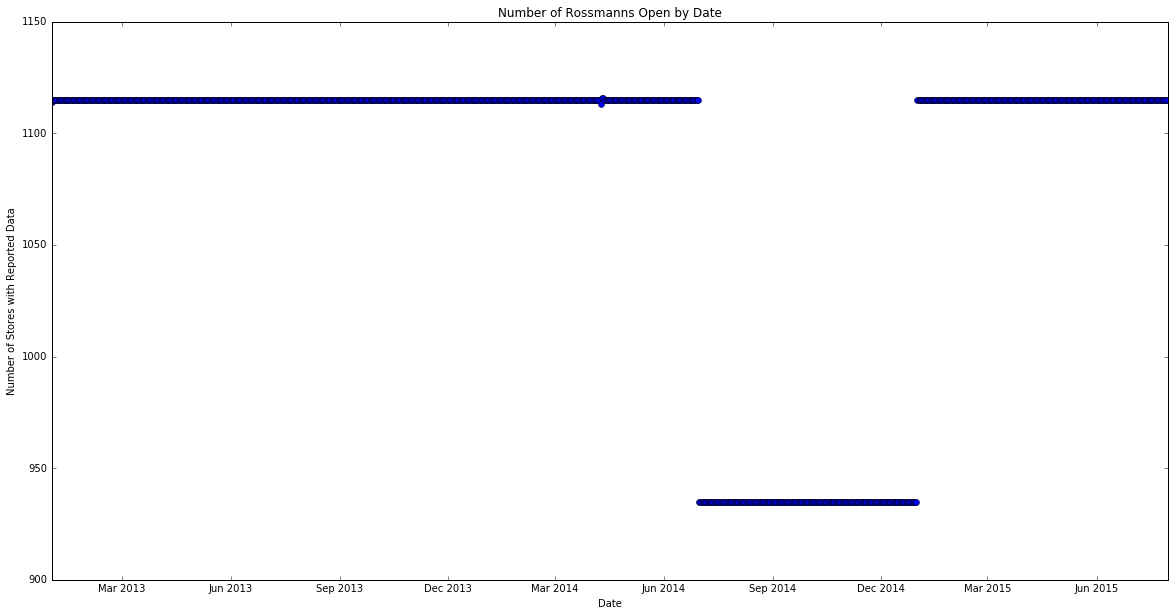

In [54]:
# column-combine dates and store counts
dates_num_stores = np.column_stack((dates, num_stores))

# plot stores operating with data versus date
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
ax.plot_date(new_x, num_stores, fmt="bo", tz=None, xdate=True)
ax.set_title("Number of Rossmanns Open by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Stores with Reported Data")

In [55]:
# confirm this anomaly by looking at number of stores before, during, and after this drop
### before anomaly
print "On June 1st, 2014, there were " + str(len(np.unique(train["Store"][train["Date"] == "6/1/14"]))) + " stores open and reporting data.\n"

### during anomaly
print "On July 1st, 2014, there were " + str(len(np.unique(train["Store"][train["Date"] == "7/1/14"]))) + " stores open and reporting data."
print "On December 31st, 2014, there were " + str(len(np.unique(train["Store"][train["Date"] == "12/31/14"]))) + " stores open and reporting data."
print "On January 1st, 2015, there were " + str(len(np.unique(train["Store"][train["Date"] == "1/1/15"]))) + " stores open and reporting data.\n"

### after anomaly
print "On March 1st, 2015, there were " + str(len(np.unique(train["Store"][train["Date"] == "3/1/15"]))) + " stores open and reporting data."

On June 1st, 2014, there were 1115 stores open and reporting data.

On July 1st, 2014, there were 935 stores open and reporting data.
On December 31st, 2014, there were 935 stores open and reporting data.
On January 1st, 2015, there were 1115 stores open and reporting data.

On March 1st, 2015, there were 1115 stores open and reporting data.


Thus, it appears we are missing data from 1115 - 935 = 180 stores, from July 1st 2014 to December 31st 2014 (7/1/14 - 12/31/14). With this information, we need to proceed by identifying which stores themselves are missing data. This will be done by seeing which stores are normally reporting data (all 1115 of them) and subtracting the stores reporting data during the anomaly period, like on October 15th, 2014 (08/15/15).

In [56]:
# find missing stores
allstores = np.unique(train["Store"])
stores_oct152015 = train["Store"][train["Date"] == "8/15/14"]
missing_stores = list(set(allstores) - set(stores_oct152015))

With all missing stores' indices saved in missing_stores, we need to address one more concern and begin our first imputation: the first value in num_stores, indicating New Year's Day of 2013, is 1114, which means one store was not open and not reporting data. This single problematic observation can be resolved rather simply. Since the same store was open on January 1st of 2014, both were weekdays, and there is no major reason to believe New Year's Day sales vary drastically year to year, we can impute the sales and customers from 2014 for 2013. 

In [57]:
# impute Sales for 1-1-13 for one store by identifying it first
stores_jan12013 = train["Store"][train["Date"] == "1/1/13"]
missing_store_jan12013 = list(set(allstores) - set(stores_jan12013))
print "The store missing data for January 1, 2013, is Store " + str(missing_store_jan12013[0]) + "."

The store missing data for January 1, 2013, is Store 988.


In [58]:
# impute its Sales from 1-1-14
temp_row = train[train["Store"] == 988]
temp_row = temp_row[temp_row["Date"] == "1/1/14"]
temp_row["DayOfWeek"] = temp_row["DayOfWeek"] - 1 # because year before means day of the week shifts back one day
temp_row["Date"] = "1/1/13"

In [59]:
# impute the information into train dataset, check if succesful
train = train.append(temp_row)
stores_jan12013 = train["Store"][train["Date"] == "1/1/13"]
missing_store_jan12013 = list(set(allstores) - set(stores_jan12013))
if(missing_store_jan12013 == []):
    print "The imputation was successful! No missing store data on 1/1/13. Data imputed from 1/1/14."
else:
    print "The imputation was unsuccessful."

The imputation was successful! No missing store data on 1/1/13. Data imputed from 1/1/14.


Now that we successfully and reasonably imputed the data for this one strange date, we can direct our attention towards imputing data for the range of dates spanning 7/1/14 through the end of the calendar year of 2014, 12/31/14. We will start this process by simply imputing for one store (perhaps the smallest numbered store, Store 13) and then repeating this action for all stores in missing_stores.

**Regarding the variability of Sales:** Due to the volatile nature of sales, per the class-provided webpage https://www.kaggle.com/nsecord/rossmann-store-sales/filling-gaps-in-the-training-set/, we think it is best to work with natural log of sales during imputation, then converting it back to normal sales. A column for logsales is appended to dataframe train below.

Note: In order to account for the 0 Sales days, we cannot simply log the sales since the 0 sales days will be ignored. Instead, we had to uniquely transform Sales via the following method: log (x + 1), so that 0 maps to 0!

In [60]:
# add logsales to train dataset
train["LogSales"] = np.log(np.add(train["Sales"], 1))
# find lowest numbered missing store to practice imputations on
print "The store that is missing data in the anomaly period with the lowest titled number is Store " + str(min(missing_stores))

The store that is missing data in the anomaly period with the lowest titled number is Store 13


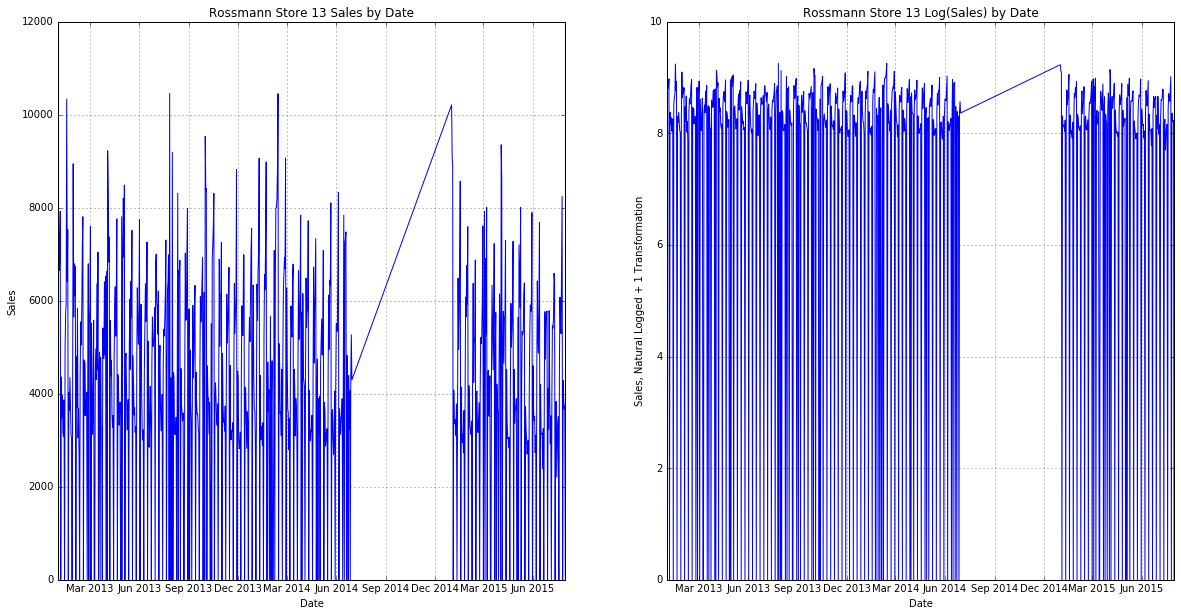

In [61]:
# observe sales and log(sales) of Store 13 versus date, verify our decision to use log
# prepare x and y's for plot
### numericize (temporarily) the dates
dates_ = list(set(train["Date"][train["Store"] == 13]))
dates_chronological_ = sorted(dates_, key=lambda x: datetime.datetime.strptime(x, '%m/%d/%y'))
dates_ = sorted(set(dates_chronological_), key=lambda x: datetime.datetime.strptime(x, '%m/%d/%y'))
new_x = matplotlib.dates.datestr2num(dates_)

# plot
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,2,1)
ax.plot_date(new_x, train["Sales"][train["Store"] == 13], fmt="b-", tz=None, xdate=True)
ax.set_title("Rossmann Store 13 Sales by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Sales")
ax.grid(True)
axlog = fig.add_subplot(1,2,2)
axlog.plot_date(new_x, train["LogSales"][train["Store"] == 13], fmt="b-", tz=None, xdate=True)
axlog.set_title("Rossmann Store 13 Log(Sales) by Date")
axlog.set_xlabel("Date")
axlog.set_ylabel("Sales, Natural Logged + 1 Transformation")
axlog.grid(True)

From the above, we see our transformation caused a strangely long plot of the log sales vs date, but reduced volatility at the peaks. Ultimately, we think this will help improve our imputations. 

# Data Imputation of "Anomaly" Period

Our method of imputation will be the following: We know our missing time period is from 7/1/14 through 12/31/14. The frequency of 0 Sales dates are likely due to particular days, like holidays, etc. As a result of this, we will cross reference the same time period in  2013 and match 0 Sales dates with each other for each Store ID, imputing 0 sales for the same date in 2014. For dates with actual positive sales, we will develop a method of imputation that takes into account the day of the week, store ID, presence of a promotion, and customers that visited the store.

Note: The data for date 1/1/13 was already imputed in the previous part.

In [62]:
# create empty storage variables, per Kaggle link https://www.kaggle.com/nsecord/rossmann-store-sales/filling-gaps-in-the-training-set/comments
# date range storage from http://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python

dates_anomaly = []

start = datetime.datetime.strptime("7/1/14", "%m/%d/%y")
end = datetime.datetime.strptime("1/1/15", "%m/%d/%y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    dates_anomaly.append(date.strftime("%-m/%-d/%y"))


n_missing = len(dates_anomaly)*len(missing_stores)
empty_frame = pd.DataFrame(columns=list(train.columns.values))
empty_frame["Date"] = dates_anomaly*len(missing_stores)
empty_frame.head(n=5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,LogSales
0,NaN,NaN,7/1/14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,7/2/14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,7/3/14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,7/4/14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,7/5/14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are largely concerned with imputing the Sales (and LogSales) and Customers; for other information like Promo, Open, State & School Holiday, we will rely on majority vote of other data-reporting stores on the same date. 

In [63]:
for day in dates_anomaly:
    empty_frame["Store"][empty_frame["Date"] == day] = missing_stores
    
    day_of_week = np.unique(train["DayOfWeek"][train["Date"] == day])[0]
    empty_frame['DayOfWeek'][empty_frame["Date"] == day] = [day_of_week]*len(missing_stores)
    
    # do nothing for Sales yet, already NaNs
    
    # do nothing for Customers yet, already NaNs
    
    open_ = Counter(train["Open"][train["Date"] == day]).most_common(1)[0][0]
    empty_frame['Open'][empty_frame["Date"] == day] = [open_]*len(missing_stores)
    
    promo_ = Counter(train["Promo"][train["Date"] == day]).most_common(1)[0][0]
    empty_frame['Promo'][empty_frame["Date"] == day] = [promo_]*len(missing_stores)
    
    sth_ = Counter(train["StateHoliday"][train["Date"] == day]).most_common(1)[0][0]
    empty_frame['StateHoliday'][empty_frame["Date"] == day] = [sth_]*len(missing_stores)
    
    sch_ = Counter(train["SchoolHoliday"][train["Date"] == day]).most_common(1)[0][0]
    empty_frame['SchoolHoliday'][empty_frame["Date"] == day] = [sch_]*len(missing_stores)
    
    # do nothing for LogSales yet, already NaNs

In [64]:
print "The head of the empty dataset, prepped for imputation, is the following: "
empty_frame.head(n=6)

The head of the empty dataset, prepped for imputation, is the following: 


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,LogSales
0,512,2,7/1/14,NaN,NaN,1,1,0,0,NaN
1,512,3,7/2/14,NaN,NaN,1,1,0,0,NaN
2,512,4,7/3/14,NaN,NaN,1,1,0,0,NaN
3,512,5,7/4/14,NaN,NaN,1,1,0,0,NaN
4,512,6,7/5/14,NaN,NaN,1,0,0,0,NaN
5,512,7,7/6/14,NaN,NaN,0,0,0,0,NaN


In [65]:
# impute some of the Sales, Customers, and LogSales using Open
len_empty = np.shape(empty_frame)[0]

for i in range(len_empty):
    if (empty_frame.loc[i, ["Open"]][0] == 0):
        empty_frame.set_value(i, 'Sales', 0)
        empty_frame.set_value(i, 'Customers', 0)
        empty_frame.set_value(i, 'LogSales', 0)   ####NOTE: this part works

In [66]:
### Impute all Open == 1 Sales using conditioned median

#Determine pivot table - from https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
imputation = train.pivot_table(values=["Sales"], index=["Store","DayOfWeek","Promo"], aggfunc=np.median)
imputation

# from https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
for i, row in empty_frame.loc[empty_frame['Sales'].isnull(),:].iterrows():
    ind = tuple([row['Store'],row['DayOfWeek'],row['Promo']])
    empty_frame.loc[i,'Sales'] = imputation.loc[ind].values[0]

In [67]:
### Impute all Open == 1 Customers using conditioned median

#Determine pivot table - from https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
imputation = train.pivot_table(values=["Customers"], index=["Store","DayOfWeek","Promo"], aggfunc=np.median)
imputation

for i, row in empty_frame.loc[empty_frame['Customers'].isnull(),:].iterrows():
    ind = tuple([row['Store'],row['DayOfWeek'],row['Promo']])
    empty_frame.loc[i,'Customers'] = imputation.loc[ind].values[0]

In [68]:
### Impute all Open == 1 LogSales using conditioned median

#Determine pivot table - from https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
imputation = train.pivot_table(values=["LogSales"], index=["Store","DayOfWeek","Promo"], aggfunc=np.median)
imputation

for i, row in empty_frame.loc[empty_frame['LogSales'].isnull(),:].iterrows():
    ind = tuple([row['Store'],row['DayOfWeek'],row['Promo']])
    empty_frame.loc[i,'LogSales'] = imputation.loc[ind].values[0]

In [69]:
# view all NaN data, now imputed completely!
empty_frame

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,LogSales
0,512,2,7/1/14,5398,1302,1,1,0,0,8.59397
1,512,3,7/2/14,5497,1303,1,1,0,0,8.61214
2,512,4,7/3/14,5495,1327,1,1,0,0,8.61178
3,512,5,7/4/14,5982,1502,1,1,0,0,8.69668
4,512,6,7/5/14,4325,1036.5,1,0,0,0,8.3724
5,512,7,7/6/14,0,0,0,0,0,0,0
6,512,1,7/7/14,4928.5,1290.5,1,0,0,0,8.50299
7,512,2,7/8/14,4798,1241,1,0,0,0,8.47616
8,512,3,7/9/14,4725,1222,1,0,0,0,8.46083
9,512,4,7/10/14,5057.5,1253.5,1,0,0,0,8.5288


In [70]:
# append "imputed" frame to train dataset
train = train.append(empty_frame)

In [85]:
# view completed imputation
train.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,LogSales,Year,Month,Day
0,1,5,7/31/15,5263,555,1,1,0,1,8.56865,2015,7,1/15
1,2,5,7/31/15,6064,625,1,1,0,1,8.71029,2015,7,1/15
2,3,5,7/31/15,8314,821,1,1,0,1,9.02582,2015,7,1/15
3,4,5,7/31/15,13995,1498,1,1,0,1,9.54653,2015,7,1/15
4,5,5,7/31/15,4822,559,1,1,0,1,8.48115,2015,7,1/15
5,6,5,7/31/15,5651,589,1,1,0,1,8.63976,2015,7,1/15
6,7,5,7/31/15,15344,1414,1,1,0,1,9.63854,2015,7,1/15
7,8,5,7/31/15,8492,833,1,1,0,1,9.047,2015,7,1/15
8,9,5,7/31/15,8565,687,1,1,0,1,9.05556,2015,7,1/15
9,10,5,7/31/15,7185,681,1,1,0,1,8.87989,2015,7,1/15


# Loading the Imputed Dataset

In [4]:
# range for all but first column
cols = range(1,11)

# convert to datetime foramt
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%y')

# load the imputed train set
imputed_0 = pd.read_csv('out-000.csv', parse_dates=['Date'], date_parser=dateparse)
imputed_1 = pd.read_csv('out-001.csv', parse_dates=['Date'], date_parser=dateparse)
imputed_2 = pd.read_csv('out-002.csv', parse_dates=['Date'], date_parser=dateparse)
imputed_3 = pd.read_csv('out-003.csv', parse_dates=['Date'], date_parser=dateparse)
imputed_4 = pd.read_csv('out-004.csv', parse_dates=['Date'], date_parser=dateparse)
imputed_5 = pd.read_csv('out-005.csv', parse_dates=['Date'], date_parser=dateparse)

# merge them together
combined = [imputed_0, imputed_1, imputed_2, imputed_3, imputed_4, imputed_5]
imputed = pd.concat(combined)

train = imputed
train.head()

C:\Users\lukak\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,LogSales
0,0,1,5,2015-07-31,5263.0,555.0,1,1,0,1,8.568646
1,1,2,5,2015-07-31,6064.0,625.0,1,1,0,1,8.710290
2,2,3,5,2015-07-31,8314.0,821.0,1,1,0,1,9.025816
3,3,4,5,2015-07-31,13995.0,1498.0,1,1,0,1,9.546527
4,4,5,5,2015-07-31,4822.0,559.0,1,1,0,1,8.481151


# Exploratory Data Analysis

After imputing the missing data, the natural next step is to explore the dataset in order to find patterns and correlations. Let's first observe the relationship between the Customers and Sales variables. Intuitively, the relationship should be linear; the more customers there are, the higher the sales numbers will be.

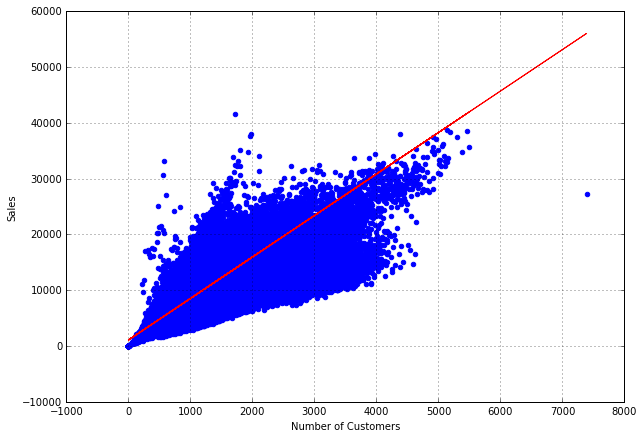

In [7]:
# extract the data
y = train['Sales'].values.astype('float')
customers = train['Customers'].values.astype('float')

# get the regression parameters
slope_lin, intercept_lin = np.polyfit(customers, y, 1)
lin_reg = intercept_lin + slope_lin*customers

# plot the data and the regression
plt.figure(figsize=(10,7))
plt.scatter(customers, y, color = "blue")
plt.plot(customers, lin_reg, color = 'red')
plt.xlabel('Number of Customers'); plt.ylabel(r'Sales')
plt.grid()

Looking at the graph above, the relationship look linear, but heteroskedasticity is present. Could it be that different store types have different imapact of the number of customers on the sales?

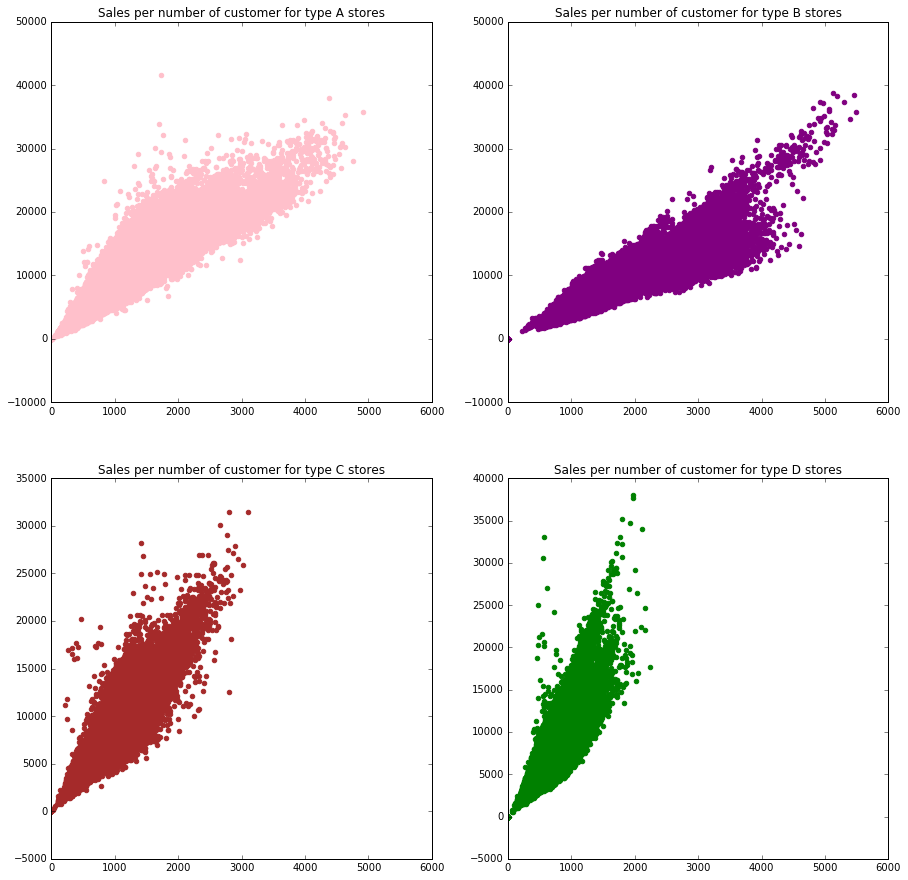

In [136]:
# get indices for each store
store_a_indices = store['Store'][store['StoreType'] == 'a']
store_b_indices = store['Store'][store['StoreType'] == 'b']
store_c_indices = store['Store'][store['StoreType'] == 'c']
store_d_indices = store['Store'][store['StoreType'] == 'd']

# get the respective sales figures
stores_a_sales = train['Sales'].loc[train['Store'].isin(store_a_indices)]
stores_b_sales = train['Sales'].loc[train['Store'].isin(store_b_indices)]
stores_c_sales = train['Sales'].loc[train['Store'].isin(store_c_indices)]
stores_d_sales = train['Sales'].loc[train['Store'].isin(store_d_indices)]

# get the respective customers figures
stores_a_customers = train['Customers'].loc[train['Store'].isin(store_a_indices)]
stores_b_customers = train['Customers'].loc[train['Store'].isin(store_b_indices)]
stores_c_customers = train['Customers'].loc[train['Store'].isin(store_c_indices)]
stores_d_customers = train['Customers'].loc[train['Store'].isin(store_d_indices)]

# plot sales per store
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

ax1.scatter(stores_a_customers, stores_a_sales, color = "pink")
ax1.set_xlim([0,6000])
ax1.set_title('Sales per number of customer for type A stores') 

ax2.scatter(stores_b_customers, stores_b_sales, color = "purple")
ax2.set_xlim([0,6000])
ax2.set_title('Sales per number of customer for type B stores') 

ax3.scatter(stores_c_customers, stores_c_sales, color = "brown")
ax3.set_xlim([0,6000])
ax3.set_title('Sales per number of customer for type C stores') 

ax4.scatter(stores_d_customers, stores_d_sales, color = "green")
ax4.set_xlim([0,6000])
ax4.set_title('Sales per number of customer for type D stores')

**Observation**:
Looking at the graphs above it is clear that type C and D stores have noticeably higher sales per customer than type A and B stores. Are the former concetrated in areas where the wealthier people reside? In addition, the "cheaper" stores have higher sales variances than the "more expensive" ones. Why is that so? Is it due to a different profile of customers, the store size or some other factor? Let's investigate further to try to find some answers.

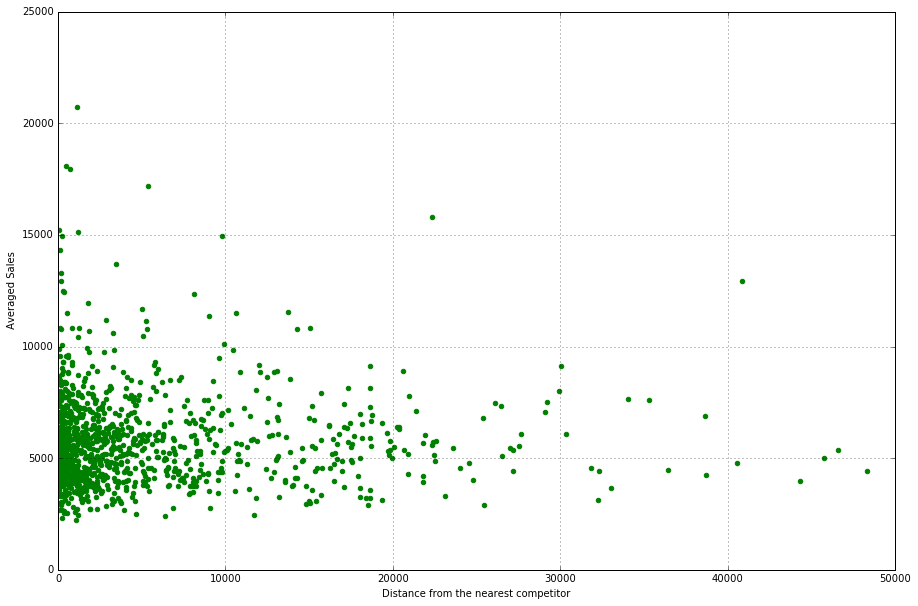

In [137]:
means = []
for i in range(0,1115):
    means.append(np.mean(train['Sales'].loc[train['Store'] == i]))
    
# plot the mean
plt.figure(figsize=(15,10))
plt.scatter(store['CompetitionDistance'], means, color = "green")
plt.xlim([0,50000])
plt.xlabel('Distance from the nearest competitor'); plt.ylabel(r' Averaged Sales')
plt.grid()
plt.show()

The above graph shows the mean sales over time plotted as a function of distance from the nearest competitor. It seems like there is no visible relationship between the two.

In [79]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [76]:
# initalize the list
day_values = []
by_day = []

# loop through each year
for i in range(0,3):
    # obtain the yearly data
    yearly_data = train.loc[train['Date'].str.endswith(str(i+13), na=False)]
    # find the sales for each day and sum them up
    for j in range(1,8):
        day_data = yearly_data['Sales'].loc[yearly_data['DayOfWeek'] == j]
        by_day.append(day_data)
        day_values.append(sum(day_data))

# split the list in order to get the yearly data
year_2013_by_day = day_values[0:7]
year_2014_by_day = day_values[7:14]
year_2015_by_day = day_values[14:21]

# day of the week
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
x = range(1,8)

In [77]:
by_day[0].values[:]

array([  7193.,   7528.,  10503., ...,   8984.,  21237.,   6905.])

In [78]:
box_data = pd.DataFrame()

for i in range(0,7):
    temp_data = pd.DataFrame({days[i]:by_day[i].values})
    box_data.loc[:,i] = temp_data
box_data.head()

,0,1,2,3,4,5,6
0,7193.0,2362.0,0.0,0.0,6110.0,5659.0,0.0
1,7528.0,2148.0,0.0,0.0,5582.0,3561.0,0.0
2,10503.0,4081.0,0.0,0.0,8158.0,3927.0,0.0
3,17412.0,9813.0,0.0,0.0,11159.0,10954.0,0.0
4,6681.0,2009.0,0.0,0.0,5516.0,2303.0,0.0


**Comment**:
We were not able to boxplot days for the chosen 3 years (2013,2014,2015), but we most definitely will do it in the final version. Let's now explore how the total amount of sales for each day of the week varies for the above mentioned years.

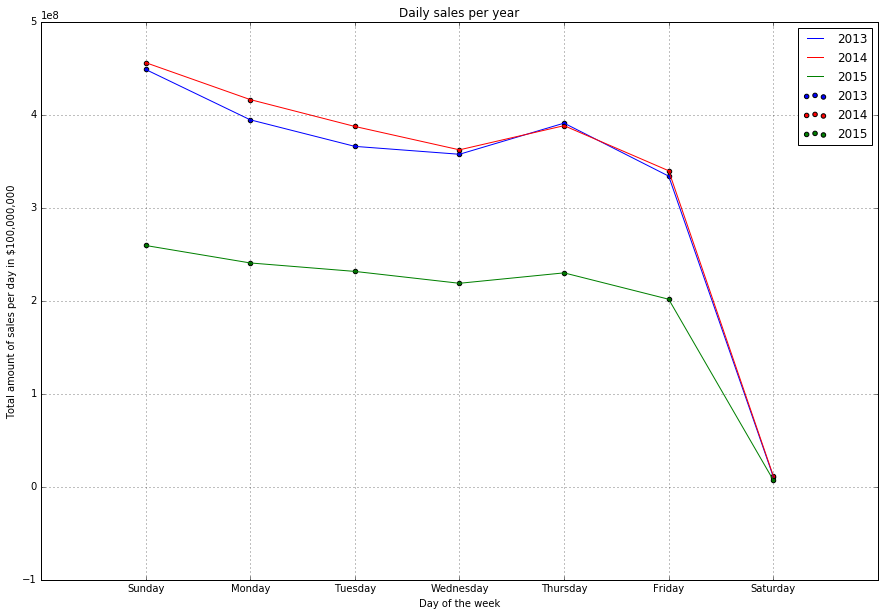

In [79]:


fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.scatter(x, year_2013_by_day, c='b', label='2013')
ax.plot(x, year_2013_by_day, c='b', label='2013')

ax.scatter(x, year_2014_by_day, c='r', label='2014')
ax.plot(x, year_2014_by_day, c='r', label='2014')

ax.scatter(x, year_2015_by_day, c='g', label='2015')
ax.plot(x, year_2015_by_day, c='g', label='2015')

ax.set_xlabel('Day of the week')
ax.set_ylabel('Total amount of sales per day in $100,000,000')
ax.set_title('Daily sales per year')

plt.xticks(x, days)
ax.legend(loc = 'best')
plt.grid()
plt.show()

The graph above shows that Sundays are usually the busiest while Saturdays are the least busy. The weekdays have had about the same relative amount of sales through all 3 years. In addition to observing seasonality, we can see that the sales sifgnificantly declined in 2015 compared to 2013 and 2014. This graph shows that using time series to predict the sales might be the way to go.

In [120]:
# create columns for further data visualization
train['Year']  = train['Date'].apply(lambda x: int(str(x)[:4]))
train['Month'] = train['Date'].apply(lambda x: int(str(x)[5:7]))
train['Year-Month'] = train['Date'].apply(lambda x: str(x)[:7])

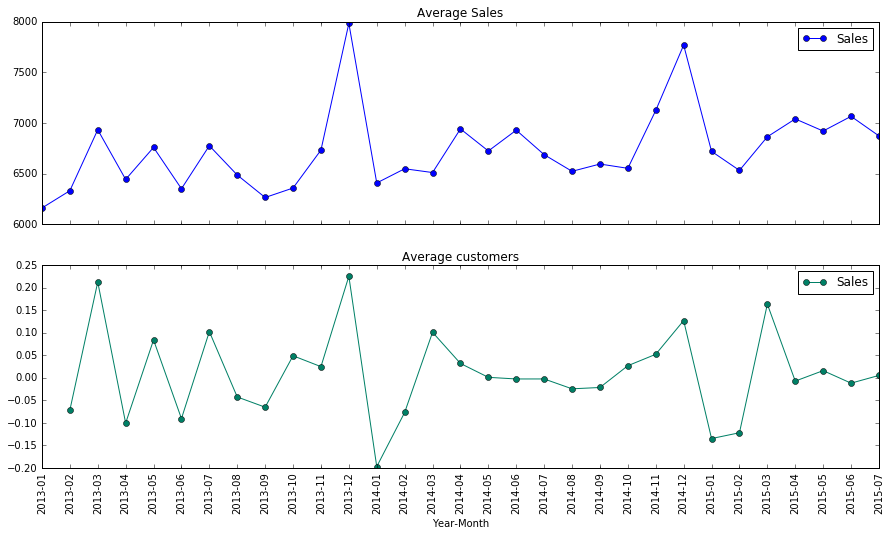

In [132]:
# group by date and get average sales, and precent change
average_sales    = train.groupby('Year-Month')["Sales"].mean()
average_customers = train.groupby('Year-Month')["Customers"].mean()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Average customers")

Above we can see that the there is a monthly seasonality trend when it comes to sales. December seems to be the busiest month (Christmas time?), while the period from August to November seems to be slim (as well as January). Can we take advantage of this finding in our model?

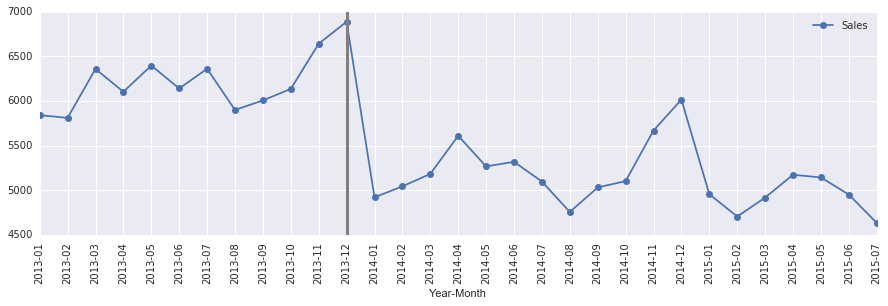

In [156]:
store_id = 6
store_data = train[train["Store"] == store_id]

average_store_sales = store_data.groupby('Year-Month')["Sales"].mean()

# Get year, and month when Competition started
y = store["CompetitionOpenSinceYear"].loc[store["Store"]  == store_id].values[0]
m = store["CompetitionOpenSinceMonth"].loc[store["Store"] == store_id].values[0]

# Plot 
ax = average_store_sales.plot(legend=True,figsize=(15,4),marker='o')
ax.set_xticks(range(len(average_store_sales)))
ax.set_xticklabels(average_store_sales.index.tolist(), rotation=90)

# Since all data of store sales given in rossmann_df starts with year=2013 till 2015,
# So, we need to check if year>=2013 and y & m aren't NaN values.
if y >= 2013 and y == y and m == m:
    plt.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='grey')

The graph above shows us what happens when the competition opens in the vicinity. The sales sharply go down and they struggle to reach the previous heights. It makes sense to include the "CompetitionOpenSince_" in the model.

## Data Modeling

After our exploration of the data, we can now model store sales. We'll apply a variety of models to see what works best.

In [5]:
# merge train and store
b = train.merge(store,how='left', left_on='Store', right_on='Store')

# drop irrelevant columns
j = b.drop(['Unnamed: 0', 'PromoInterval'], axis=1)

# fill any missing values
z = j.fillna(j.median(), inplace=True)

# get dummies for categorical variables
final = pd.get_dummies(z)

# create index for predictor and response variables
cols = [col for col in final.columns if col not in ['Date', 'Sales', 'LogSales']]

In [6]:
x = final[cols].values
y = final['Sales'].values

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

In [7]:
# linear regression
linear = Lin_Reg()
linear.fit(x_train,y_train)
lin_score_train = linear.score(x_train,y_train)
lin_score_test = linear.score(x_test,y_test)

# ridge regression
ridge = Ridge(alpha=3.0)
ridge.fit(x_train,y_train)
ridge_score_train = ridge.score(x_train,y_train)
ridge_score_test = ridge.score(x_test, y_test)

# decision tree
tree = DecisionTree()
tree.fit(x_train,y_train)
tree_score_train = tree.score(x_train,y_train)
tree_score_test = tree.score(x_test, y_test)

In [8]:
score_df = pd.DataFrame({#'knn': knn_scores, 
                         'linear train': lin_score_train,
                         'linear test': lin_score_test,
                         'ridge train': ridge_score_train,
                         'ridge test': ridge_score_test,
                         'tree train': tree_score_train,
                         'tree test': tree_score_test}, 
                          index=['R^2 value']
    )

score_df

,linear test,linear train,ridge test,ridge train,tree test,tree train
R^2 value,0.898793,0.899614,0.898793,0.899613,0.972464,0.999523


**Observations**:
 * As we can see above, the decision tree seems to be doing the best job, as evidenced by very high values of the R_squared on the test set.That is most likely due to the binary nature of the variables given since the multiple linear regression assumes strict linearity between the response and each predictor. The results above along with the dataset nature indicate that the decision tree (or its sibling models) should perform the best. In order to find what models can we build off of this, we will do further visual analysis to notice any lags in the dataset.

# Further exploration

In [6]:
print 'Median Sales value is ' + str(final['Sales'].median())
print 'Median Customers number is ' + str(final['Customers'].median())

Median Sales value is 5739.0
Median Customers number is 606.0


In [16]:
# reassure values are properly imputed
final['Sales'].loc[(final['Sales'] == 0.0)] = 5764
final['Customers'].loc[(final['Customers'] == 0.0)] = 629

Let's plot a random store data to observe the trends.

In [14]:
x_2 = final['Date'][final['Store']==2]
y_2 = final['Sales'][final['Store']==2]

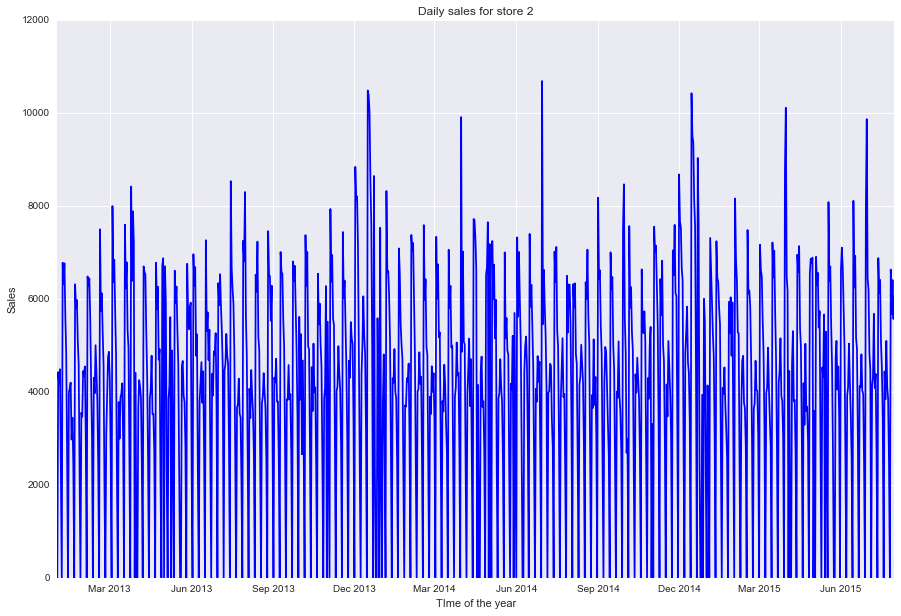

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.plot(x_2, y_2, c='b', label='2013')
ax.set_xlabel('TIme of the year')
ax.set_ylabel('Sales')
ax.set_title('Daily sales for store 2')

With the imputed medians, the store sales clearly look like a time series. The seasonality might be present as well. Let's see what happens when we observe the autocorrelation among the data for year 2015.

In [94]:
# found online
def plot_pacf(x, ax=None, lags=None, alpha=.05, method='ywm',
                use_vlines=True, **kwargs):

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    if lags is None:
        lags = np.arange(len(x))
        nlags = len(lags) - 1
    else:
        nlags = lags
        lags = np.arange(lags + 1) # +1 for zero lag

    acf_x, confint = pacf(x, nlags=nlags, alpha=alpha, method=method)

    if use_vlines:
        ax.vlines(lags, [0], acf_x, **kwargs)
        ax.axhline(**kwargs)

    # center the confidence interval TODO: do in acf?
    confint = confint - confint.mean(1)[:,None]
    kwargs.setdefault('marker', 'o')
    kwargs.setdefault('markersize', 5)
    kwargs.setdefault('linestyle', 'None')
    ax.margins(.05)
    ax.plot(lags, acf_x, **kwargs)
    ax.fill_between(lags, confint[:,0], confint[:,1], alpha=.25)
    ax.set_title("Partial Autocorrelation")


    return fig

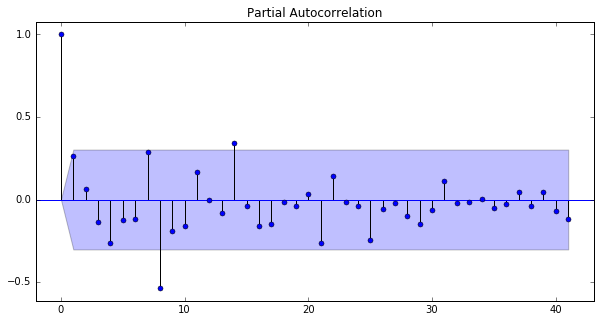

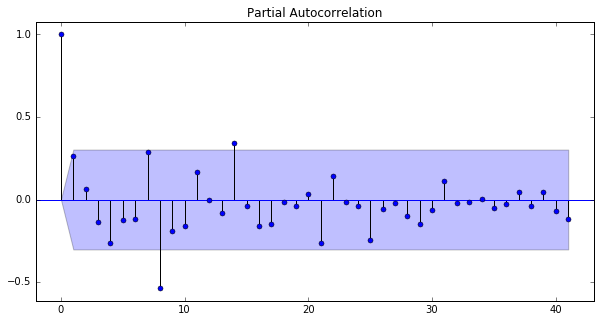

In [95]:
plot_pacf(y[900:])

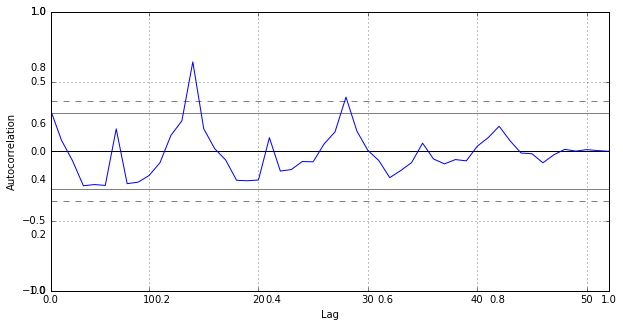

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
autocorrelation_plot(y[890:])

Looking at the graphs above, we can observe some spikes at 7, 14, and 21 days. We will use this information below in our VAR model.

# More suitable models

## VAR

In [10]:
store_2 = final[final['Store']==2]
dates = final['Date'][final['Store']==2]
final_2 = store_2[['Sales', 'Customers', 'Open','Promo', 'SchoolHoliday']]

In [22]:
train = final_2[:600]
test = final_2[600:]

In [12]:
mdata = train
mdata.index = dates[:600]

model = VAR(mdata.values)

results = model.fit(maxlags=30, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 15, Dec, 2016
Time:                     04:04:13
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    13.8826
Nobs:                     583.000    HQIC:                   11.9166
Log likelihood:          -6813.83    FPE:                    43115.8
AIC:                      10.6608    Det(Omega_mle):         21669.5
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const       6170.164543      1000.959412            6.164           0.000
L1.y1         -0.001966         0.115467           -0.017           0.986
L1.y2         -1.110343         0.994069           -1.117           0.265
L1.y3       1155.

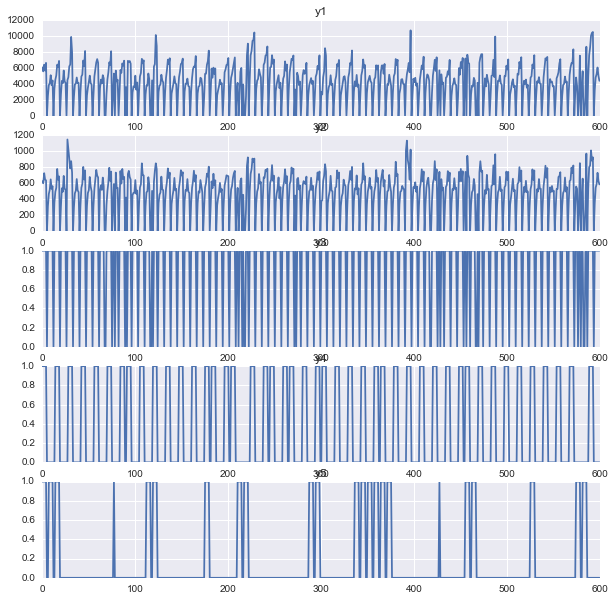

In [13]:
results.plot()

The graph above shows the vector autoregression for each of the 5 variables (the function does it automatically). The first graph shows the regression for Sales and that is our object of interest. Given the complexity of the data, we decided to minimize the amount of predictor variables and our error below shows we did a good job. VAR managed to produce very decent results and outperform the decision tree. So far it is our best model.

In [14]:
lag_order = results.k_ar
a = results.forecast(train.values[-lag_order:], 342)
sales_prediction = a[:,0]
sales_actual = test['Sales'].values
#sales_actual.shape
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())/10000

print 'The root mean square prediction error for VAR method is ' + str(rmse(sales_prediction, sales_actual))

The root mean square prediction error for VAR method is 0.160791973212


In [42]:
sales_actual = final_2[600:]
sales_predicted =  sales_prediction
dates_2 = final['Date'][final['Store']==2][:342]

Let's plot the graph to visualize our VAR predictions.

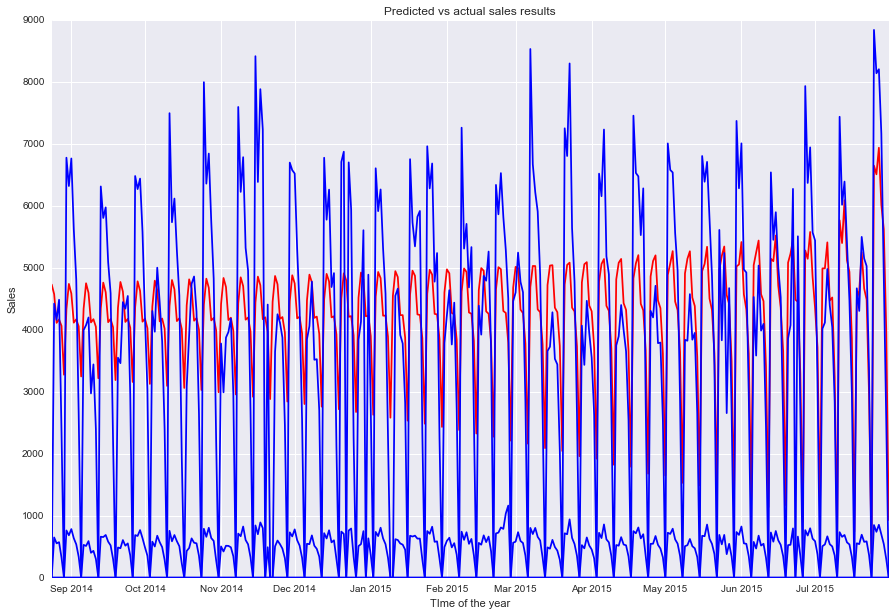

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.plot(dates_2, sales_prediction, c='r', label='predicted sales')
ax.plot(dates_2, sales_actual, c='b', label='actual sales')
ax.set_xlabel('TIme of the year')
ax.set_ylabel('Sales')
ax.set_title('Predicted vs actual sales results')

Looking at our predictions above, we can see the problem with the snowball effect, that is the constant increase in the error rates. A different model (tree, linear regression) might reduce the effect, but at cost of being less precise (after all, this is a time series data). In the end, given the nature of the competition and the fact that we are only required to produce predictions for the 6-week period, the VAR seems like a way to go.

## Tree revisited

While the tree had a good r-squared, let's see how it performs when it comes to RMSPE. Only then will we know how does it fare against vector autoregression.

In [41]:
xtrain = train[['Customers', 'Open','Promo', 'SchoolHoliday']]
ytrain = train[['Sales']]

xtest = test[['Customers', 'Open','Promo', 'SchoolHoliday']]
ytest = test[['Sales']]

# new decision tree
tree = DecisionTree()
tree.fit(xtrain,ytrain)
tree_prediction = tree.predict(xtest)
original = ytest.values

rmse(original, tree_prediction)

print 'The root mean square prediction error for VAR method is ' + str(rmse(original, tree_prediction))

The root mean square prediction error for VAR method is 0.322624741027


As we can see, the tree performs approximately twice as bad as the VAR. It seems that the autoregression is better suited for the task given we are handling a time series data.

## Moving average

For the end, let's look at a very simple model that takes into account a set number of past days and takes their mean as prediction. Give the weak seasonality we observed, it could be a good way to go!

In [269]:
val = final_2['Sales'][600:]
sales_actual = test['Sales'].values

#running mean function
def running_mean(l, N):
    sum = 0
    result = list( 0 for x in l)

    for i in range( 0, N ):
        sum = sum + l[i]
        result[i] = sum / (i+1)

    for i in range( N, len(l) ):
        sum = sum - l[i-N] + l[i]
        result[i] = sum / N

    return result

In [277]:
list_rmse = []
neighbors = range(1,100)
for i in neighbors:
    moving_predicted = running_mean(list(val), i)
    error = rmse(moving_predicted, sales_actual)
    list_rmse.append(error)

In [287]:
neigbors = np.array(neighbors)
list_rmse = np.array(list_rmse)
min_error = np.argmin(list_rmse)
print 'The minimal error is achieved when ' + str(min_error+1) + ' previous sales days are taken.'

The minimal error is achieved when 99 previous sales days are taken.


The fact that the more days we take into account yiels the lowest error is not a surprise. Let's explore how the error changes as we increase the number of days.

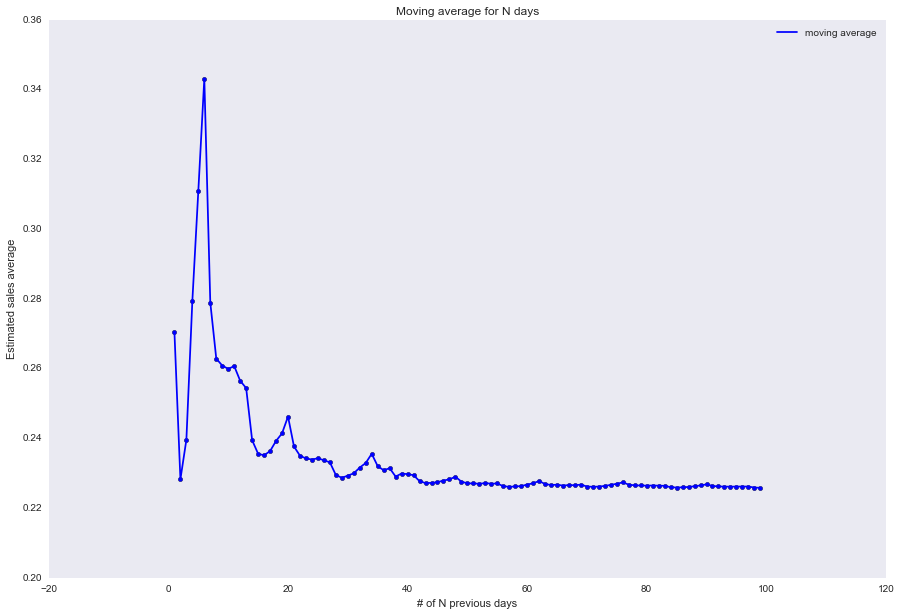

In [279]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.scatter(neighbors, list_rmse, c='b',)
ax.plot(neigbors, list_rmse, c='b', label='moving average')

ax.set_xlabel('# of N previous days')
ax.set_ylabel('Estimated sales average')
ax.set_title('Moving average for N days')

ax.legend(loc = 'best')
plt.grid()
plt.show()

By using the moving average we can notice that the error hovers around 0.25 which is fairly decent considering the minimal amount of information needed. The lowest rate is when 33 previous days are taken which vaguely corresponds to including data up to a month old into the model. Let's now visualize the discrepancies between the moving average estimates and the actual observations.

In [294]:
moving_average_prediction = running_mean(list(val), 3)

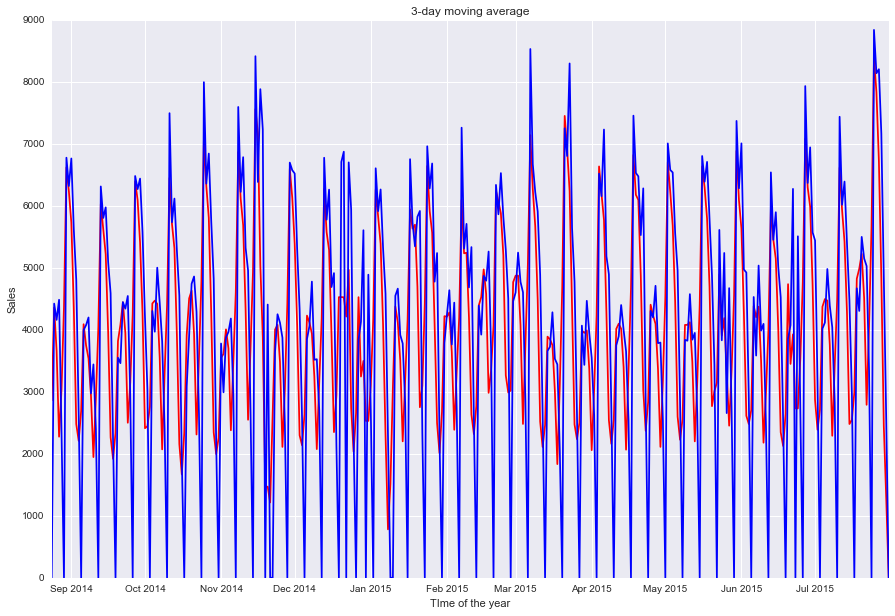

In [296]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.plot(dates_2, moving_average_prediction, c='r', label='predicted sales')
ax.plot(dates_2, sales_actual, c='b', label='actual sales')
ax.set_xlabel('TIme of the year')
ax.set_ylabel('Sales')
ax.set_title('3-day moving average')

Looking at the graph above, we can see that by taking a moving average with a low number of days, we can follow to peaks and lows of the curve. The more days we take, the smoother the line gets and, after a certain treshold, the error starts to monotonically decrease. In this case, we are esentially experiencing a trade-off between mimicking the volatility in sales variations (and thereby at any point being closer to the true sales value), and smoothing that same variance in order to gain marginal benefits in overall predicition accuracy. In the end, this is a  remarkably simple model (it takes only into account the previous sales figures) and yields very good results. 

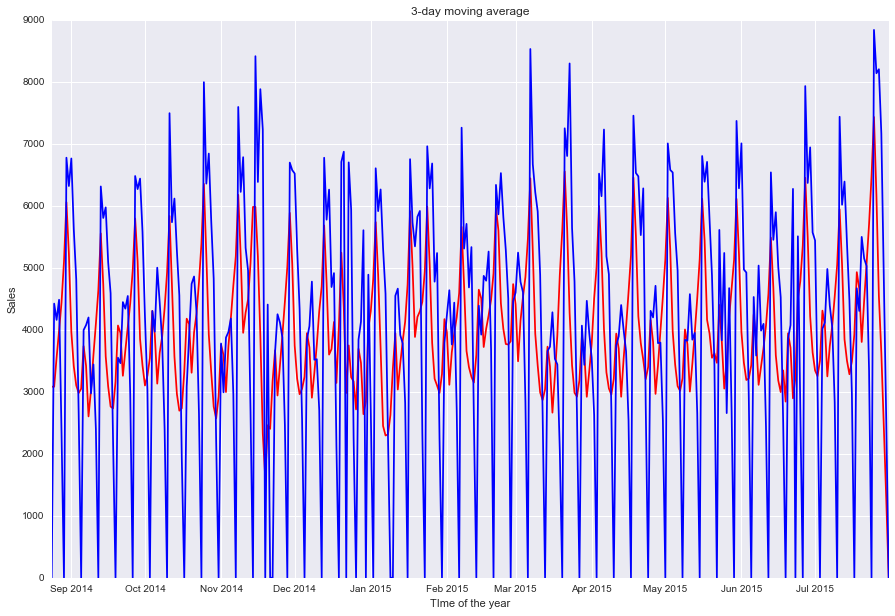

In [297]:
moving_average_prediction = running_mean(list(val), 5)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.plot(dates_2, moving_average_prediction, c='r', label='predicted sales')
ax.plot(dates_2, sales_actual, c='b', label='actual sales')
ax.set_xlabel('TIme of the year')
ax.set_ylabel('Sales')
ax.set_title('3-day moving average')

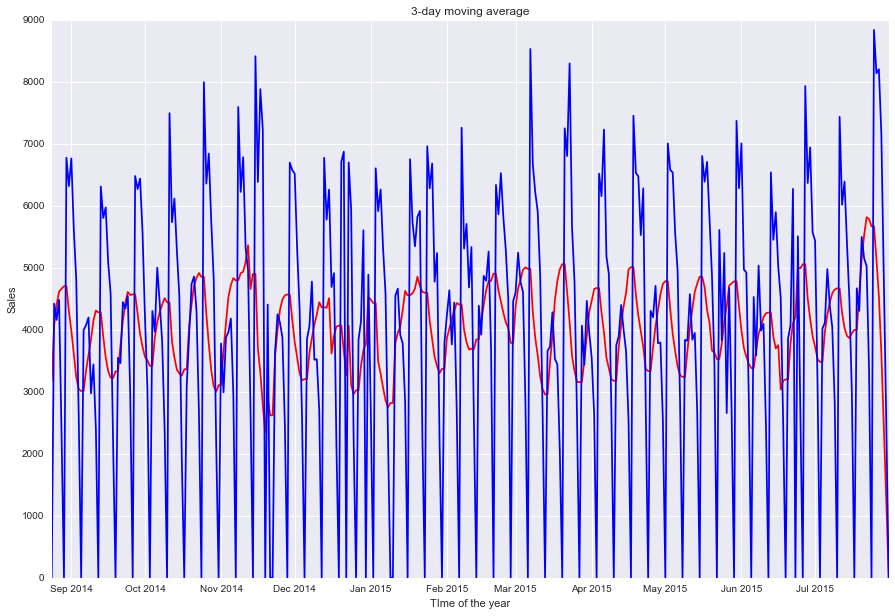

In [298]:
moving_average_prediction = running_mean(list(val), 7)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.plot(dates_2, moving_average_prediction, c='r', label='predicted sales')
ax.plot(dates_2, sales_actual, c='b', label='actual sales')
ax.set_xlabel('TIme of the year')
ax.set_ylabel('Sales')
ax.set_title('3-day moving average')

**Conclusion and notes:**
 * All 3 models performed decently. While the moving average model offers simplicity and its easy to understand, its error is considerably larger (by 0.09) than that of VAR which is our best model with an error rate of 0.16 which is very reasonable given the relative performance of the majority of the Kaggle takers. The decision tree didn't perform as well, but that was probably due to the fact that we weren't able to install xgboost on the computer (Windows). Had that model been implemented, we would expect our results to be even better.

---

In [6]:
%%html

Page Links — <a href="index.html" target="_self">Project Overview Page</a>
— <a href="page1.html" target="_self">Dataset Page</a>
— <a href="page2.html" target="_self">Data Imputation Page</a>
— <a href="page3.html" target="_self">Data Exploration Page</a>
— <a href="page4.html" target="_self">Data Modeling Page</a>